<a href="https://colab.research.google.com/github/visiont3lab/chat-app/blob/master/OpenCVPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OpenCV Camera Face Detector

## Collect Camera Image

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


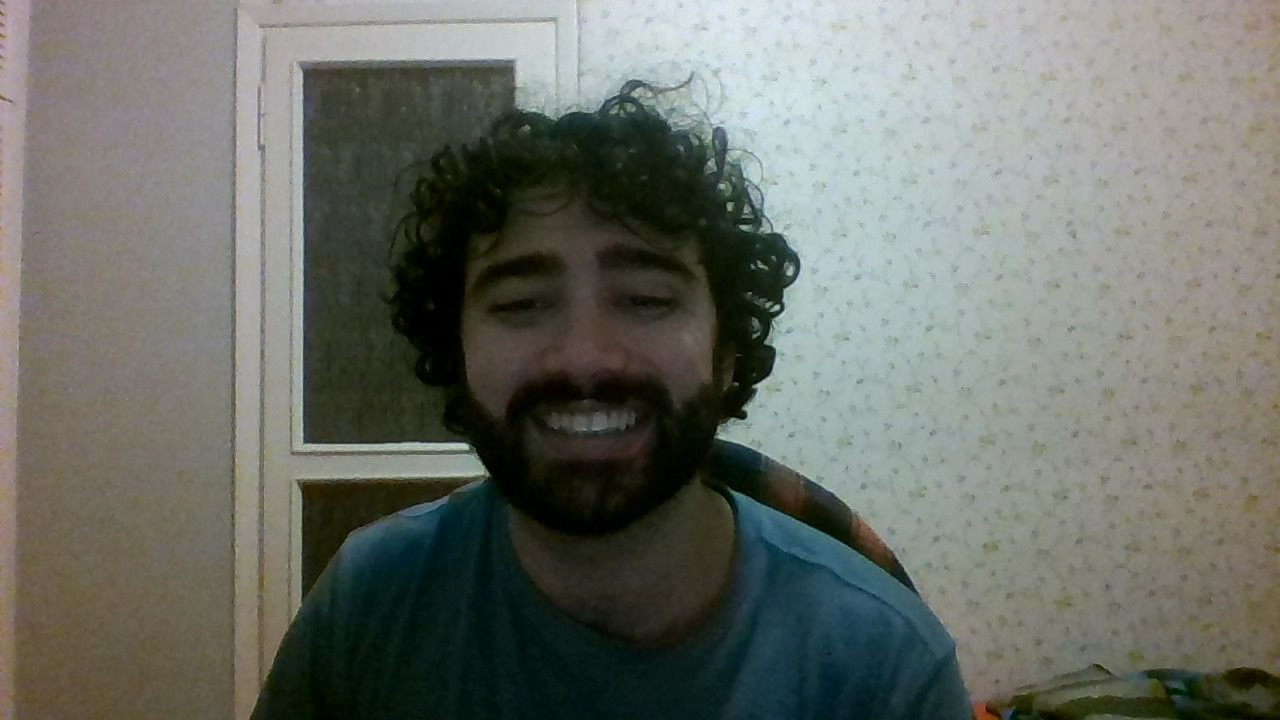

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

## Algorithm

* [OpenCV Haar Cascade classifier](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_objdetect/py_face_detection/py_face_detection.html)

In [ ]:
!git clone https://github.com/anaustinbeing/haar-cascade-files.git

Cloning into 'haar-cascade-files'...
remote: Enumerating objects: 28, done.
remote: Total 28 (delta 0), reused 0 (delta 0), pack-reused 28
Unpacking objects: 100% (28/28), done.


In [ ]:
import cv2
import numpy as np 
from google.colab.patches import cv2_imshow

In [77]:
class test:
    def __init__(self):
        self.a = 5

    def pr(self):
        self.b = 10
        print(self.a)

    def add(self):
        return self.a + self.b

t = test()
t.pr()
t.add()

5


15

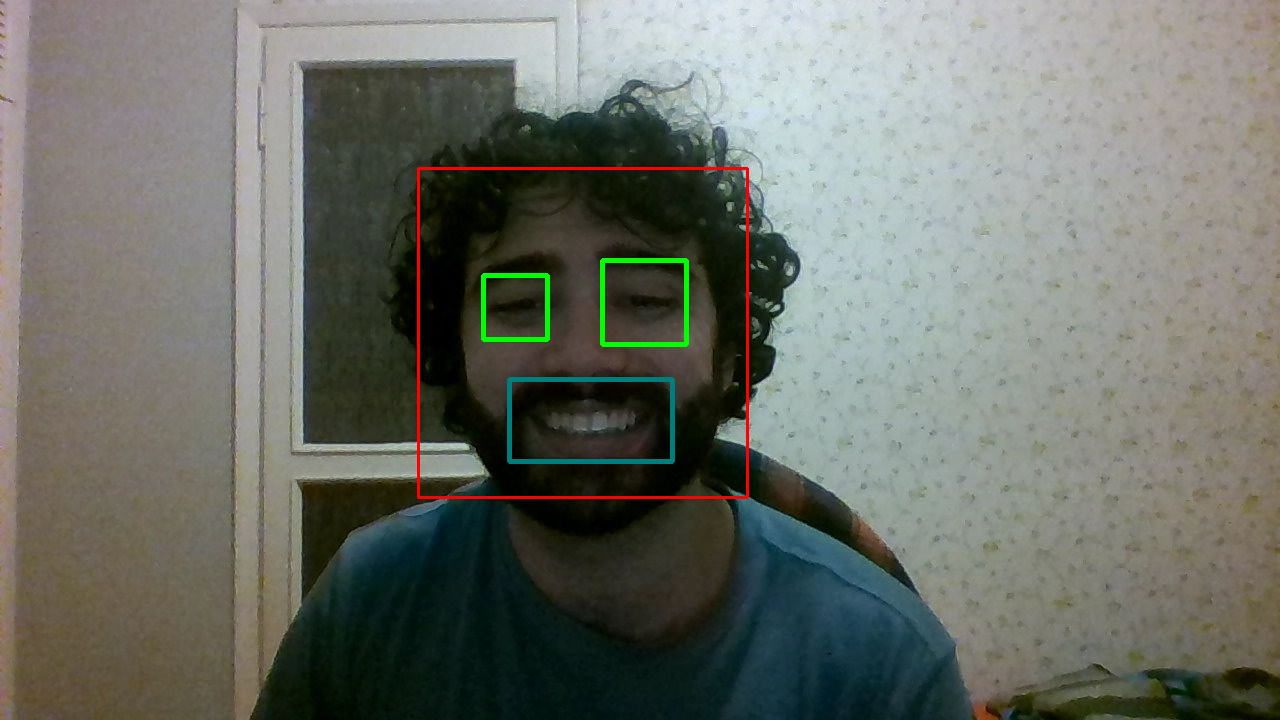

In [74]:
face_cascade = cv2.CascadeClassifier('haar-cascade-files/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haar-cascade-files/haarcascade_eye.xml')
smile_cascade = cv2.CascadeClassifier('haar-cascade-files/haarcascade_smile1.xml')  

def run_1(im):
    gray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 5)
    for (x,y,w,h) in faces:
        cv2.rectangle(im,(x,y),(x+w,y+h),(0,0,255),2) # RGB--> BGR
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = im[y:y+h, x:x+w]

        eyes = eye_cascade.detectMultiScale(roi_gray,1.1,5)
        for (ex,ey,ew,eh) in eyes:
            #cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),3)
            cv2.rectangle(im,(x+ex,y+ey),(x+ex+ew,y+ey+eh),(0,255,0),3)

        smile = smile_cascade.detectMultiScale(roi_gray,1.3,5)
        for (sx,sy,sw,sh) in smile:
            cv2.rectangle(im,(x+sx,y+sy),(x+sx+sw,y+sy+sh),(125,125,0),3)
    return im

im = cv2.imread("photo.jpg",cv2.IMREAD_COLOR)
imp = run_1(im)
cv2_imshow(imp)

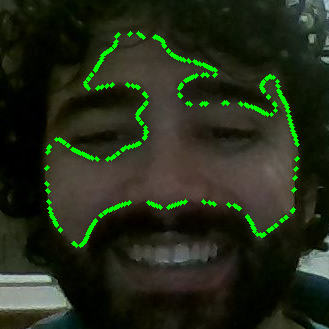

In [104]:
# !git clone https://github.com/anaustinbeing/haar-cascade-files.git
class algorithm:

    def __init__(self):
        self.face_cascade = cv2.CascadeClassifier('haar-cascade-files/haarcascade_frontalface_default.xml')
        self.eye_cascade = cv2.CascadeClassifier('haar-cascade-files/haarcascade_eye.xml')
        self.smile_cascade = cv2.CascadeClassifier('haar-cascade-files/haarcascade_smile1.xml')  

    def find_features(self,im):
        gray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
        faces = self.face_cascade.detectMultiScale(gray, 1.1, 5)
        for (x,y,w,h) in faces:
            cv2.rectangle(im,(x,y),(x+w,y+h),(0,0,255),2) # RGB--> BGR
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = im[y:y+h, x:x+w]

            eyes = self.eye_cascade.detectMultiScale(roi_gray,1.1,5)
            for (ex,ey,ew,eh) in eyes:
                #cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),3)
                cv2.rectangle(im,(x+ex,y+ey),(x+ex+ew,y+ey+eh),(0,255,0),3)

            smile = self.smile_cascade.detectMultiScale(roi_gray,1.3,5)
            for (sx,sy,sw,sh) in smile:
                cv2.rectangle(im,(x+sx,y+sy),(x+sx+sw,y+sy+sh),(125,125,0),3)
        return im

    def find_face_profile(self,im):
        gray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
        faces = self.face_cascade.detectMultiScale(gray, 1.1, 5)
        for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = im[y:y+h, x:x+w]
            
            ret,thresh = cv2.threshold(roi_gray,40,255,cv2.THRESH_BINARY)
            thresh = cv2.medianBlur(thresh,15)
            contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            areas = [cv2.contourArea(c) for c in contours]
            max_index = np.argmax(areas)
            cnt=contours[max_index]
            #hull = cv2.convexHull(cnt)

            cv2.drawContours(roi_color, cnt, -1, (0,255,0), 3)
            cv2_imshow(roi_color)

alg = algorithm()
im = cv2.imread("photo.jpg",cv2.IMREAD_COLOR)
imp = alg.find_face_profile(im)



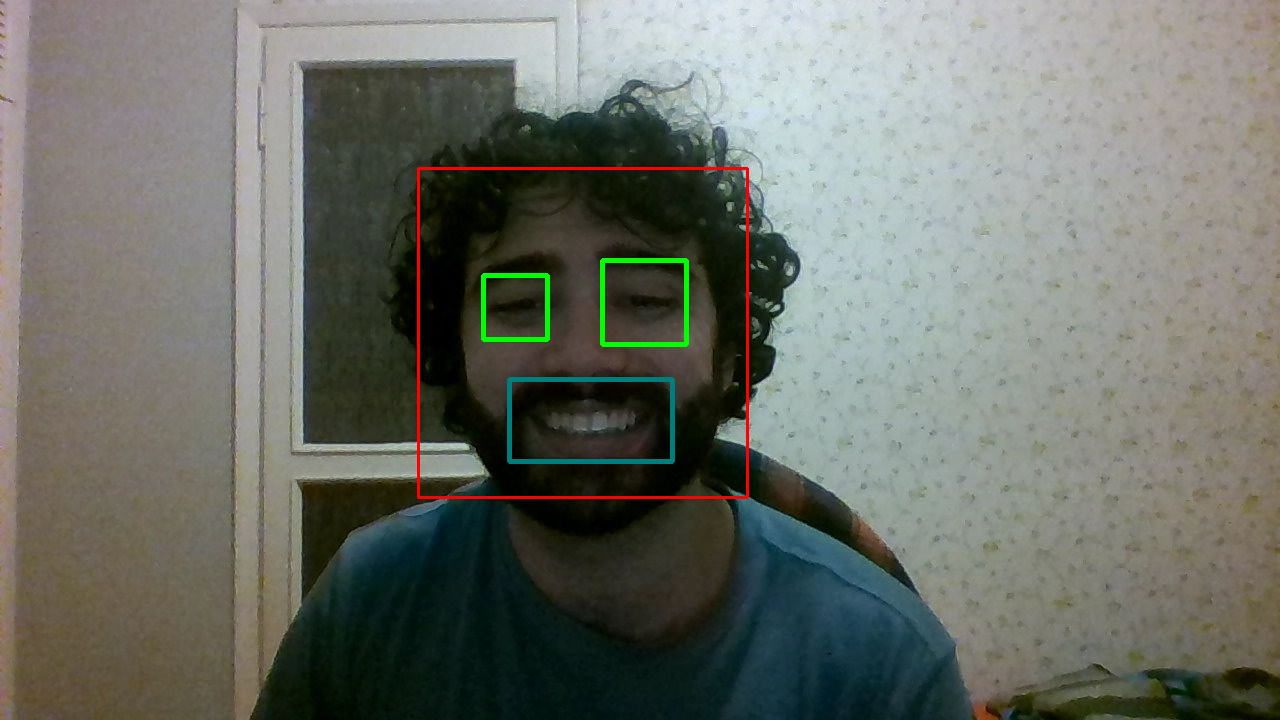

In [ ]:
def process_image(im):
    imp = cv2.cvtColor(im, cv2.COLOR_RGB2HSV)
    #imp = imp[:,:,1]
    return imp

im = cv2.imread("photo.jpg",cv2.IMREAD_COLOR)
imp = cv2.cvtColor(im, cv2.COLOR_RGB2HSV)
gray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
face_cascade = cv2.CascadeClassifier('haar-cascade-files/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haar-cascade-files/haarcascade_eye.xml')
smile_cascade = cv2.CascadeClassifier('haar-cascade-files/haarcascade_smile1.xml')

faces = face_cascade.detectMultiScale(gray, 1.1, 5)

'''
x= 600 # colonne
y = 300 # righe
w = 50
h = 80
cv2.rectangle(im,(x,y),(x+w,y+h),(0,255,0), 3)
'''

for (x,y,w,h) in faces:
    cv2.rectangle(im,(x,y),(x+w,y+h),(0,0,255),2) # RGB--> BGR
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = im[y:y+h, x:x+w]

    eyes = eye_cascade.detectMultiScale(roi_gray,1.1,5)
    for (ex,ey,ew,eh) in eyes:
        #cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),3)
        cv2.rectangle(im,(x+ex,y+ey),(x+ex+ew,y+ey+eh),(0,255,0),3)

    smile = smile_cascade.detectMultiScale(roi_gray,1.3,5)
    for (sx,sy,sw,sh) in smile:
        cv2.rectangle(im,(x+sx,y+sy),(x+sx+sw,y+sy+sh),(125,125,0),3)

cv2_imshow(im)

#im = process_image(im)
#cv2_imshow(im)